In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X,Y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

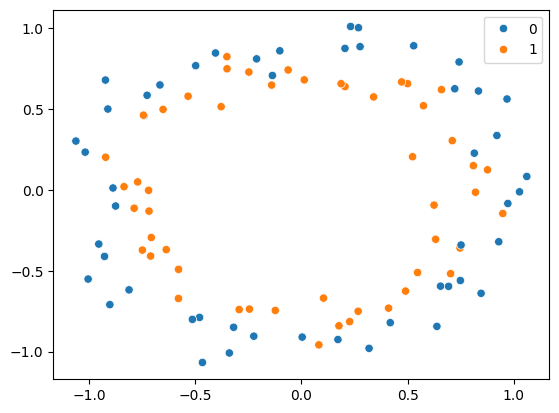

In [4]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=3500,verbose=0)

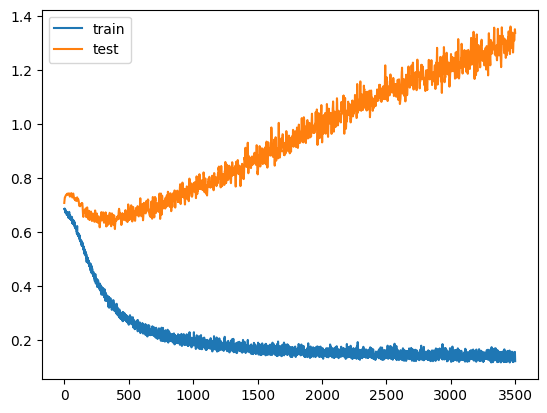

In [10]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

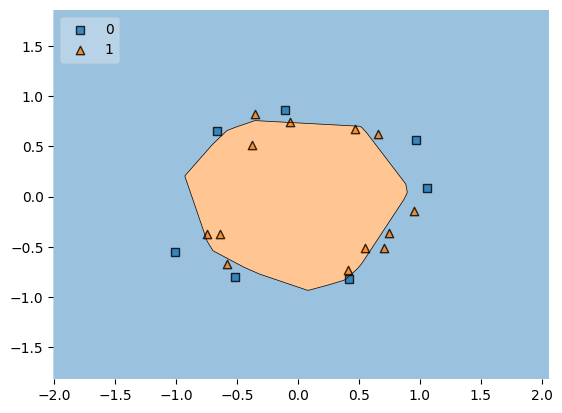

In [13]:
plot_decision_regions(X_test,Y_test.ravel(),clf=model,legend=2)

# EARLY STOPPING

In [18]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## ARGUMENTS : 

### monitor: Quantity to be monitored. Defaults to "val_loss".
### min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.
### patience: Number of epochs with no improvement after which training will be stopped. Defaults to 0.
### verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action. Defaults to 0.
### mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".
### baseline: Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None.
### restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set. Defaults to False.
### start_from_epoch: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped. Defaults to 0.

In [20]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose=1,
    mode="auto",
    baseline = None,
    restore_best_weights = False
)

In [21]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.5117 - loss: 0.6946 - val_accuracy: 0.4000 - val_loss: 0.6980
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5359 - loss: 0.6907 - val_accuracy: 0.3000 - val_loss: 0.7045
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5125 - loss: 0.6889 - val_accuracy: 0.3500 - val_loss: 0.7085
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5297 - loss: 0.6858 - val_accuracy: 0.3500 - val_loss: 0.7130
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5227 - loss: 0.6869 - val_accuracy: 0.3500 - val_loss: 0.7157
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5383 - loss: 0.6833 - val_accuracy: 0.3500 - val_loss: 0.7191
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5383 - loss: 0.6840 - val_accuracy: 0.3500 - val_loss: 0.7223
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5383 - loss: 0.6813 - val_accuracy: 0.3500 - 

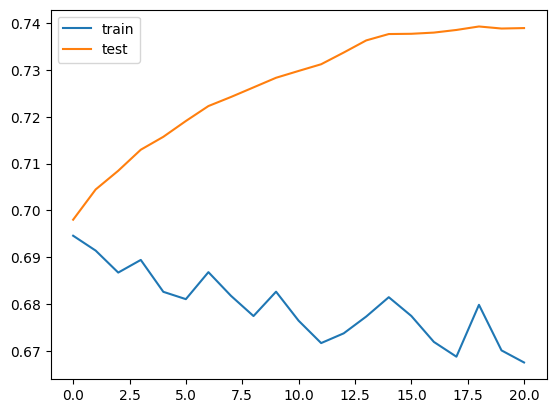

In [22]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

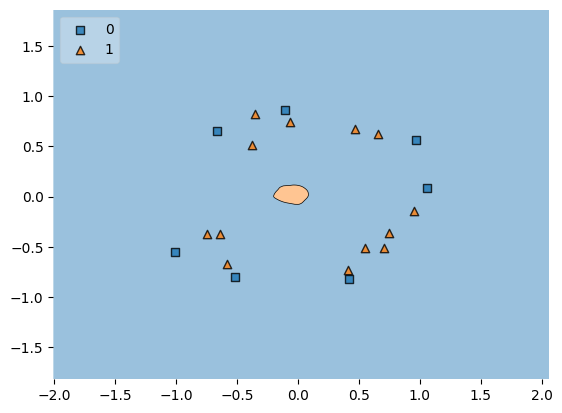

In [23]:
plot_decision_regions(X_test,Y_test.ravel(),clf=model,legend=2)

# DATA SCALING AND FEATURE SCALING

In [24]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/python jupyter/Deep Learning/csv files/Social_Network_Ads.csv')

In [25]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
df = df[['Age','EstimatedSalary','Purchased']]

In [27]:
X = df.drop('Purchased',axis=1)
Y = df['Purchased']

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

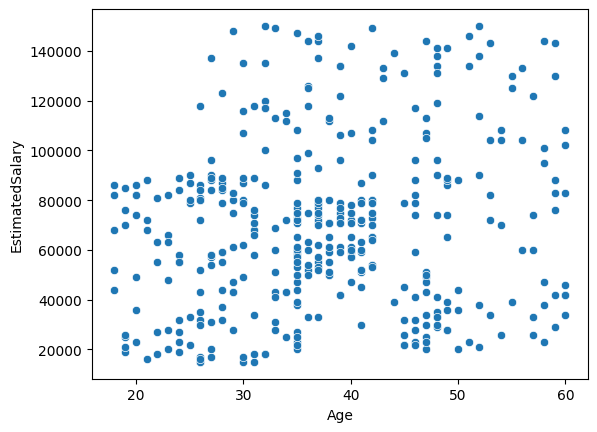

In [29]:
sns.scatterplot(x = df.iloc[:,0],y = df.iloc[:,1])

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [31]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5320 - loss: 212.0302 - val_accuracy: 0.4000 - val_loss: 138.4649
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4114 - loss: 182.9184 - val_accuracy: 0.6000 - val_loss: 224.3126
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4993 - loss: 151.2691 - val_accuracy: 0.6000 - val_loss: 178.8856
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5666 - loss: 78.4175 - val_accuracy: 0.4000 - val_loss: 36.1671
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5104 - loss: 25.8135 - val_accuracy: 0.4000 - val_loss: 37.0771
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4934 - loss: 28.0944 - val_accuracy: 0.4000 - val_loss: 117.3095
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4516 - loss: 109.0207 - val_accuracy: 0.4000 - val_loss: 187.2262
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4367 - loss: 147.3699 

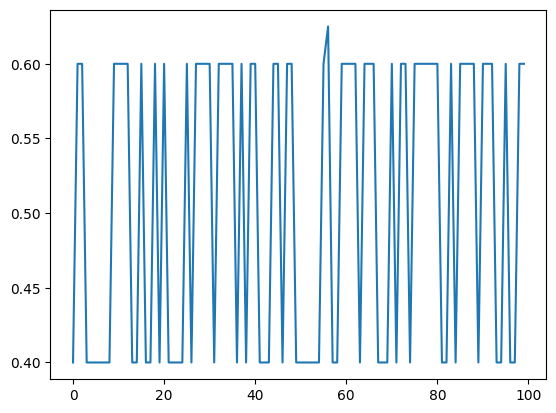

In [37]:
plt.plot(history.history['val_accuracy'])

## applying data standardization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

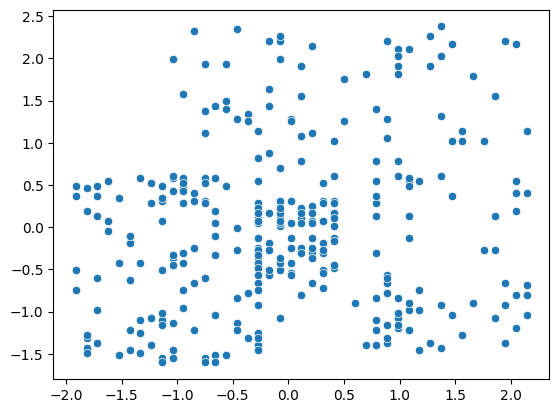

In [44]:
sns.scatterplot(x = X_train_scaled[:,0],y = X_train_scaled[:,1])

In [45]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [48]:
history = model.fit(X_train_scaled,Y_train,validation_data=(X_test_scaled,Y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6574 - loss: 0.7012 - val_accuracy: 0.6000 - val_loss: 0.6604
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6394 - loss: 0.6416 - val_accuracy: 0.6750 - val_loss: 0.6010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7781 - loss: 0.5759 - val_accuracy: 0.7375 - val_loss: 0.5512
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7498 - loss: 0.5484 - val_accuracy: 0.7500 - val_loss: 0.5075
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7918 - loss: 0.5128 - val_accuracy: 0.7875 - val_loss: 0.4709
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8140 - loss: 0.4725 - val_accuracy: 0.7875 - val_loss: 0.4377
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8073 - loss: 0.4695 - val_accuracy: 0.8000 - val_loss: 0.4097
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8388 - loss: 0.4348 - val_accuracy: 0.8125 - 

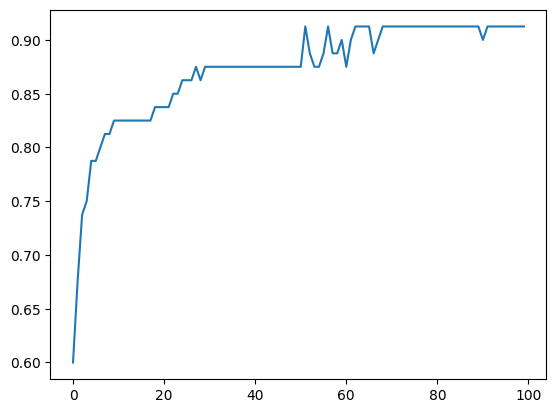

In [49]:
plt.plot(history.history['val_accuracy'])